In [ ]:
#!c1.8
from google.colab import drive
drive.mount('/content/drive')

In [226]:
#!c1.8
%pip install --upgrade tensorflow

Traceback (most recent call last):
  File "/kernel/lib/python3.7/site-packages/ml_kernel/state/state_protocol.py", line 287, in _load_component
    value = unpickler.load()
KeyError: 41945

The above exception was the direct cause of the following exception:

ml_kernel.state.state_protocol.KernelStateProtocol.DeserializationException


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


In [227]:
#!c1.8
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

import urllib.request
from PIL import Image
from io import BytesIO
import cv2

from tqdm import tqdm

In [228]:
#!c1.8
User = pd.read_csv('User.csv')
User

,Unnamed: 0,key,name,source,prod_id,free_use,main,links,DCT
0,1,8432700,ce2d6a0db80a79abb6aa234964cab51d1d8ccd34.jpeg,USER,8103296,True,False,https://api.ratengoods.com/api/v0.10/image/843...,[1. 0. 0. ... 0. 0. 0.]
1,2,8293113,37d1921e825fbfd2ac4e0383ec112452ee06d580.jpeg,USER,8103296,True,False,https://api.ratengoods.com/api/v0.10/image/829...,[1. 0. 0. ... 0. 0. 0.]
2,3,8686092,6b3fc8fc6dcaf0a76ff4d6624141e576dbbf95e3.jpeg,USER,8103296,True,False,https://api.ratengoods.com/api/v0.10/image/868...,[1. 0. 1. ... 1. 1. 1.]
3,4,8783186,c0ef57e0836f85c5de4fa9a9495ac994b259c4d3.jpeg,USER,8103296,True,False,https://api.ratengoods.com/api/v0.10/image/878...,[1. 1. 1. ... 0. 0. 0.]
4,5,8656028,113d6d399d113839e304057a7084bdc2b68e5512.png,USER,8103296,True,False,https://api.ratengoods.com/api/v0.10/image/865...,[1. 1. 0. ... 1. 1. 1.]
...,...,...,...,...,...,...,...,...,...
4524,6484,8745323,d882dbe685e8ba7c444be3624f60a89b96a1b26f.jpeg,USER,6285408,True,False,https://api.ratengoods.com/api/v0.10/image/874...,[1. 1. 0. ... 0. 0. 0.]
4525,6485,1396667,3a8d9c50e2fe65b741482d8fa8fb66487aaa1318.jpeg,USER,6285408,True,False,https://api.ratengoods.com/api/v0.10/image/139...,[1. 0. 1. ... 0. 0. 0.]
4526,6486,1642245,93e766c1da1000a7f79105463fc9fd4fb07fe16c.jpeg,USER,6285408,True,False,https://api.ratengoods.com/api/v0.10/image/164...,[1. 0. 0. ... 1. 1. 1.]
4527,6487,9823921,10019cfc6295130cef942a06e2ad23dfafea8a50.jpeg,USER,6285408,True,False,https://api.ratengoods.com/api/v0.10/image/982...,[1. 0. 0. ... 0. 0. 0.]


In [229]:
#!c1.8
notUser = pd.read_csv('notUser.csv')
notUser

,Unnamed: 0,key,name,source,prod_id,free_use,main,links,DCT
0,0,22545842,dbeeb267b8c481b7c41eacf3f16e55e5d6aeea56.jpeg,admitad_utkonos,8103296,False,False,https://api.ratengoods.com/api/v0.10/image/225...,[1. 0. 0. ... 0. 0. 0.]
1,1,2607097,34d9ab04e08bc3b1d3e4b7cf95137fa0c7dd0da1.jpeg,RNG,8103296,False,True,https://api.ratengoods.com/api/v0.10/image/260...,[1. 0. 0. ... 0. 0. 0.]
2,2,10082717,1a65cd4b8d6044cb54ab49e633bcbad65da80bc3.jpeg,RNG,945018,False,True,https://api.ratengoods.com/api/v0.10/image/100...,[1. 0. 0. ... 0. 0. 0.]
3,3,19345482,0ba7695ed17d7d192e9369803ee33e596dc5231c.jpeg,admitad_apteka_dialog,945018,False,False,https://api.ratengoods.com/api/v0.10/image/193...,[1. 0. 0. ... 0. 0. 0.]
4,4,22203067,33410d5c413f5034970be4809684bd90ecec5bc1.jpeg,epn_metro,6285009,False,False,https://api.ratengoods.com/api/v0.10/image/222...,[1. 0. 0. ... 0. 0. 0.]
...,...,...,...,...,...,...,...,...,...
1523,1523,29782365,36307f2ad2f3452394664bd58b1f4d37e9b1f486.png,brandquad_danone,28924468,False,False,https://api.ratengoods.com/api/v0.10/image/297...,[0. 0. 0. ... 1. 1. 1.]
1524,1524,29782373,49c5daf23f0db8006a3fe21dab070e1d84ba0454.png,brandquad_danone,28924468,False,False,https://api.ratengoods.com/api/v0.10/image/297...,[0. 0. 0. ... 0. 0. 0.]
1525,1525,29782465,29bff5169adab42ea15457cf36963c24c31187aa.png,brandquad_danone,28924468,False,False,https://api.ratengoods.com/api/v0.10/image/297...,[0. 0. 0. ... 0. 0. 0.]
1526,1526,29782366,02b9baace842d969eab03685e0c247686c395834.png,brandquad_danone,28924468,False,False,https://api.ratengoods.com/api/v0.10/image/297...,[0. 0. 0. ... 1. 1. 0.]


In [245]:
#!c1.8
def url_to_image(url):

    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    # return the image
    return image

In [246]:
#!c1.8
def preprocess(im):
    im = im/255
    im = cv2.resize(im, (299,299))
    return im

In [235]:
#!c1.8
User.groupby(['prod_id']).size().reset_index(name='count').sort_values(by='count')

,prod_id,count
142,28924468,1
135,9814965,1
12,507328,1
140,25452340,1
11,506896,1
...,...,...
110,8100749,47
96,6288066,47
98,6288203,47
38,945552,48


In [234]:
#!c1.8
target = notUser[notUser.prod_id == 8100749]
nottarget = User[User.prod_id == 8100749]

target.shape, nottarget.shape

((1, 9), (47, 9))

In [239]:
#!c1.8
model = tf.keras.applications.InceptionV3(weights='imagenet', input_shape=(299, 299, 3))         #EfficientNetB6

In [172]:
#!c1.8
model.summary()

Model: "efficientnetb6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 528, 528, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 528, 528, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 528, 528, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 529, 529, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

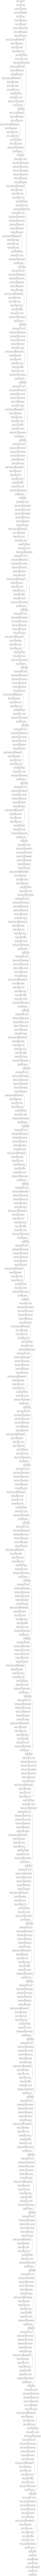

In [173]:
#!c1.8
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [240]:
#!c1.8
for layer in model.layers:
	layer.trainable = False

In [241]:
#!c1.8
model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [247]:
#!c1.8
target_im = preprocess(url_to_image(target.links.values[0])).reshape(-1,299,299,3)
target_im.shape

(1, 299, 299, 3)

In [248]:
#!c1.8
target_pred = model.predict(target_im).flatten()
target_pred.shape

(2048,)

In [249]:
#!c1.8
notUser = notUser.drop_duplicates(subset=['prod_id'])

In [368]:
#!c1.8
from scipy.spatial import distance

compare_pred = []

for link in tqdm(notUser.links.values):
    img = preprocess(url_to_image(link)).reshape(-1,299,299,3)
    img = img.reshape(-1,299,299,3)
    pred = model.predict(img).flatten()
    compare_pred.append(pred)

100%|██████████| 189/189 [00:52<00:00,  3.58it/s]


In [388]:
#!c1.8
path = '62061.jpg'

im = cv2.imread(path)
im = cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
im = preprocess(im)
im = im.reshape(-1,299,299,3)
test_pred = model.predict(im).flatten()
test_pred.shape

(2048,)

In [389]:
#!c1.8
from scipy.spatial import distance

dist = {}
for i, pred in enumerate(compare_pred):
    dist[i] = distance.cosine(pred, test_pred)

In [370]:
#!c1.8
dist

{0: 0.466599702835083,
 1: 0.421398401260376,
 2: 0.2861487865447998,
 3: 0.3727119565010071,
 4: 0.3466264009475708,
 5: 0.30782991647720337,
 6: 0.39448535442352295,
 7: 0.3101019859313965,
 8: 0.4204406142234802,
 9: 0.42953526973724365,
 10: 0.4328188896179199,
 11: 0.30338120460510254,
 12: 0.4387955069541931,
 13: 0.4286866784095764,
 14: 0.4494055509567261,
 15: 0.32140910625457764,
 16: 0.38294386863708496,
 17: 0.33192145824432373,
 18: 0.3488643169403076,
 19: 0.2470386028289795,
 20: 0.4009856581687927,
 21: 0.3344893455505371,
 22: 0.3670616149902344,
 23: 0.46156632900238037,
 24: 0.4602965712547302,
 25: 0.3159993886947632,
 26: 0.4677738547325134,
 27: 0.31937748193740845,
 28: 0.3895816206932068,
 29: 0.3815622925758362,
 30: 0.3592831492424011,
 31: 0.2803703546524048,
 32: 0.38537687063217163,
 33: 0.3383532166481018,
 34: 0.5216323435306549,
 35: 0.35865628719329834,
 36: 0.2921868562698364,
 37: 0.24790078401565552,
 38: 0.3822454810142517,
 39: 0.35963326692581177,

In [390]:
#!c1.8
import operator

scores = sorted(dist.items(), key=operator.itemgetter(1))
scores

[(73, 0.12037140130996704),
 (30, 0.14410245418548584),
 (22, 0.1831958293914795),
 (23, 0.20570778846740723),
 (104, 0.2077893614768982),
 (41, 0.23071551322937012),
 (18, 0.23163515329360962),
 (17, 0.2378959059715271),
 (7, 0.24157828092575073),
 (48, 0.2509312629699707),
 (107, 0.25153255462646484),
 (142, 0.253063440322876),
 (14, 0.25332289934158325),
 (38, 0.2558978199958801),
 (95, 0.2580713629722595),
 (102, 0.2650410532951355),
 (173, 0.2692940831184387),
 (11, 0.26984310150146484),
 (103, 0.27665936946868896),
 (127, 0.2783694863319397),
 (87, 0.2870553731918335),
 (139, 0.2879359722137451),
 (68, 0.2898768186569214),
 (148, 0.29425978660583496),
 (2, 0.2972508668899536),
 (15, 0.30311644077301025),
 (81, 0.306498646736145),
 (3, 0.3069273829460144),
 (19, 0.3086998462677002),
 (154, 0.31065046787261963),
 (37, 0.3106513023376465),
 (25, 0.31390953063964844),
 (181, 0.3144468069076538),
 (5, 0.3179425001144409),
 (119, 0.31961166858673096),
 (153, 0.3202235698699951),
 (35, 

In [391]:
#!c1.8
scores[:5]

[(73, 0.12037140130996704),
 (30, 0.14410245418548584),
 (22, 0.1831958293914795),
 (23, 0.20570778846740723),
 (104, 0.2077893614768982)]

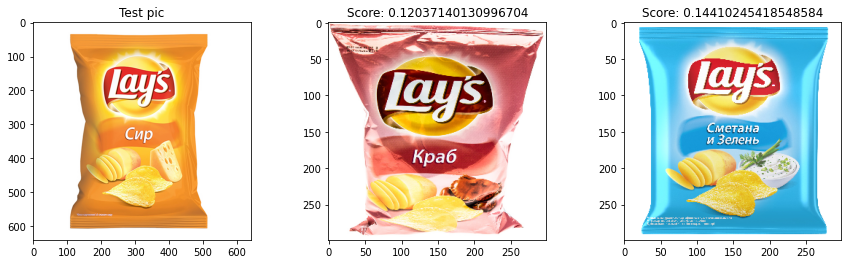

In [392]:
#!c1.8
fig,ax = plt.subplots(1,3)

im = cv2.imread(path)
im = cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
ax[0].imshow(im)
ax[0].set_title('Test pic')

i=0
for link in notUser.links.values[scores[0][0]], notUser.links.values[scores[1][0]]:
    score = scores[i][1]
    im = preprocess(url_to_image(link))
    ax[i+1].imshow(im)
    ax[i+1].set_title(f'Score: {score}')
    i+=1

fig.set_figwidth(15) 

In [194]:
#!c1.8
notUser.links.values[scores[2][0]], scores[2][1]

('https://api.ratengoods.com/api/v0.10/image/10520834', 1.7583370208740234e-05)

In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [379]:
#!c1.8
path = '62061.jpg'

In [257]:
#!c1.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
import operator
import cv2
import urllib.request

from scipy.spatial import distance
import requests
from scipy.fftpack import fft, dct

from tqdm.notebook import tqdm
from ipywidgets import IntProgress
from tqdm import tqdm

import codecs, json 
import pprint
import collections

import pickle
import re
import time

import warnings
warnings.filterwarnings("ignore")

In [293]:
#!c1.8
def distances(x, y):
    return distance.hamming(x, y)

In [292]:
#!c1.8
def DCT_quantization(imgs):
    
    DCTs = []

    for img in imgs:
        
        try:
        
            DCT = dct(img, type=2, norm='ortho')

            DCTs.append(quantization(DCT))
        
        except:
            
            DCTs.append(None)
        
    return np.array(DCTs).flatten()

In [291]:
#!c1.8
def crop(link):
    
    imgs = []
    
    im = Image.open(BytesIO(requests.get(link).content)).resize((320,320)).convert('L')
    
    for i in range(40):
        for j in range(40):
            
            im1 = im.crop((8*j, 8*i, 8*(j+1), 8*(i+1)))
        
            imgs.append(im1)
            #print(dct(im1, type=2, norm='ortho').shape)
            
    return imgs

In [290]:
#!c1.8
def crop2(path):
    
    imgs = []
    
    im = Image.open(path).resize((320,320)).convert('L')
    
    for i in range(40):
        for j in range(40):
            
            im1 = im.crop((8*j, 8*i, 8*(j+1), 8*(i+1)))
        
            imgs.append(im1)
            #print(dct(im1, type=2, norm='ortho').shape)
            
    return imgs

In [262]:
#!c1.8
def quantization(matrix):
    
    matrix_of_quantization = np.array([
        [3,2,2,3,5,6,10,12],
        [2,2,3,4,5,12,12,11],
        [3,3,3,5,8,11,14,11],
        [3,3,4,6,10,17,16,12],
        [4,4,7,11,14,22,21,15],
        [5,7,11,13,16,21,23,18],
        [10,13,16,17,21,24,24,20],
        [14,18,19,20,22,20,21,20]
    ])
    
    result = np.array(matrix / matrix_of_quantization)
    
    res = result.mean() - result[0][0]/result.mean()
    
    result[result>=res] = 1
    result[(result<res) & (result!=1)] = 0

    
    return result

In [294]:
#!c1.8
def url_to_image(url):

    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    # return the image
    return image

In [ ]:
#!c1.8
for link in tqdm(notUser.links.values):
    img = preprocess(url_to_image(link)).reshape(-1,299,299,3)
    img = img.reshape(-1,299,299,3)
    pred = model.predict(img).flatten()
    compare_pred.append(pred)

In [264]:
#!c1.8
DCTs = []

for link in tqdm(notUser.links.values):
    try:
        DCTs.append(DCT_quantization(crop(link)))
    except Exception as exp:
        #print(exp)
        DCTs.append(None)
    continue

100%|██████████| 189/189 [01:04<00:00,  2.93it/s]


In [266]:
#!c1.8
notUser.DCT = DCTs

In [267]:
#!c1.8
notUser[notUser.DCT != None]

,Unnamed: 0,key,name,source,prod_id,free_use,main,links,DCT
0,0,22545842,dbeeb267b8c481b7c41eacf3f16e55e5d6aeea56.jpeg,admitad_utkonos,8103296,False,False,https://api.ratengoods.com/api/v0.10/image/225...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,2,10082717,1a65cd4b8d6044cb54ab49e633bcbad65da80bc3.jpeg,RNG,945018,False,True,https://api.ratengoods.com/api/v0.10/image/100...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
4,4,22203067,33410d5c413f5034970be4809684bd90ecec5bc1.jpeg,epn_metro,6285009,False,False,https://api.ratengoods.com/api/v0.10/image/222...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
19,19,8778636,e4ebfd34b8340fb3d23a1b5083ebed70bac5b159.jpeg,korus,5959369,False,True,https://api.ratengoods.com/api/v0.10/image/877...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
24,24,8122512,ffb610154d04a8fb137e320defc1c8e9338d69b8.jpeg,GS1,2246303,True,True,https://api.ratengoods.com/api/v0.10/image/812...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
...,...,...,...,...,...,...,...,...,...
1364,1364,10530437,4582510b0c4942c231ad229f89cc892503758f8c.jpeg,RNG,24926366,False,True,https://api.ratengoods.com/api/v0.10/image/105...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1387,1387,10454625,9beb40760bc0d7af6e3230cd5708aa0c71ea061b.png,RNG,23885590,False,True,https://api.ratengoods.com/api/v0.10/image/104...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1413,1413,10459563,b6647fd7e4bdb528ddada4fb33c82253af4337b2.png,RNG,6285105,False,True,https://api.ratengoods.com/api/v0.10/image/104...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1441,1441,21888866,d833ea921177b6dd49038d0797780b1ea338e871.jpeg,brandquad_loreal,16315137,False,False,https://api.ratengoods.com/api/v0.10/image/218...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."


In [380]:
#!c1.8
target_DCT = DCT_quantization(crop2(path))

image = cv2.imread(path)
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (320,320))
DCT21 = image.flatten()

In [381]:
#!c1.8
target_DCT.shape

(102400,)

In [382]:
#!c1.8
DCT21.shape

(102400,)

In [383]:
#!c1.8
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import jaccard
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine


from math import sqrt

dist_hamming = {}
dist_jaccard = {}
dist_euclidean_whole1 = {}
dist_cos = {}

deleted = []

prods = notUser.prod_id.unique()

for prod_id in tqdm(prods):
    
    dist_hamming[prod_id] = {}
    dist_jaccard[prod_id] = {}
    dist_euclidean_whole1[prod_id] = {}
    dist_cos[prod_id] = {}
    
    if notUser[(notUser.prod_id == prod_id) & (notUser.main == True)].shape[0] == 0:
        links = notUser[notUser.prod_id == prod_id].links.values
    else:
        links = notUser[(notUser.prod_id == prod_id) & (notUser.main == True)].links.values
    
    for link1 in links:

        try:

            DCT1 = notUser[notUser.links == link1].DCT.values[0]
            key = notUser[notUser.links==link1].key.values[0]

            DCT11 = np.asarray(Image.open(BytesIO(requests.get(link1).content)).resize((320,320)).convert('L')).flatten()
            
            #print(DCT1.shape, target_DCT.shape)

            dist_hamming[prod_id][key] = 1-distances(DCT1, target_DCT)
            dist_jaccard[prod_id][key] = jaccard(DCT1, target_DCT)
            
            #print(DCT11.shape, DCT21.shape)
            
            dist_euclidean_whole1[prod_id][key] = euclidean(DCT11, DCT21)

            dist_cos[prod_id][key] = cosine(DCT1, target_DCT)

        except Exception as exp:
            print(exp)
            continue

100%|██████████| 189/189 [00:43<00:00,  4.30it/s]


In [298]:
#!c1.8
dist_cos

{8103296: {22545842: 0.2583227596474168},
 945018: {10082717: 0.28480998029215343},
 6285009: {22203067: 0.296818797892873},
 5959369: {8778636: 0.4382099919396315},
 2246303: {8122512: 0.48979442957300356},
 8100749: {19105538: 0.25135668916114384},
 6288557: {10024059: 0.35057051983229226},
 1349384: {8112062: 0.35703452344565956},
 8104007: {22549891: 0.25380897905607513},
 8102891: {10520834: 0.2918631474763359},
 8102880: {2605368: 0.28205411256499846},
 8101235: {8113708: 0.4171913124380997},
 53901: {10005310: 0.3352091946140565},
 6283529: {8683866: 0.3147136733766456},
 945553: {8113476: 0.4352538577756119},
 2328983: {8115303: 0.3832933225242394},
 605639: {9993021: 0.29036220535066914},
 8100190: {22203318: 0.5318467995353484},
 1349095: {10006278: 0.3465464517362029},
 511296: {10188309: 0.39738744132637027},
 6107705: {8589514: 0.30534382192766774},
 450412: {24474563: 0.29701787701641624},
 4829502: {8104398: 0.4703526783588916},
 4829771: {8104494: 0.4000318578431473},
 

In [384]:
#!c1.8
def find_best_growth(our_dict):
    k=0
    k_second = 0
    prod_best,key_best=0,0
    prod_second,key_second=0,0
    for prod_id in our_dict:
        for keys in our_dict[prod_id]:
            if our_dict[prod_id][keys]>k:
                prod_second,key_second,k_second = prod_best,key_best,k
                k=our_dict[prod_id][keys]
                prod_best, key_best=prod_id, keys
    return [prod_best,key_best,k],[prod_second,key_second, k_second]

In [344]:
#!c1.8
def find_best_downturn(our_dict):
    k=1000000
    k_second = 0
    prod_best,key_best=0,0
    prod_second,key_second=0,0
    for prod_id in our_dict:
        for keys in our_dict[prod_id]:
            if our_dict[prod_id][keys]<k:
                prod_second,key_second,k_second = prod_best,key_best,k
                k=our_dict[prod_id][keys]
                prod_best, key_best=prod_id, key
    return [prod_best,key_best,k],[prod_second,key_second, k_second]

In [385]:
#!c1.8
best2_hamming = find_best_growth(dist_hamming)
best2_jaccard = find_best_growth(dist_jaccard)
best2_euclidean_whole1 = find_best_downturn(dist_euclidean_whole1)
best2_cos = find_best_downturn(dist_cos)

In [359]:
#!c1.8
best2_jaccard

([8100190, 22203318, 0.797742576443316],
 [2246303, 8122512, 0.6833109669723403])

In [347]:
#!c1.8
def create_kont(link):
    image = url_to_image(link)
    
    image = cv2.resize(image, (320,320))

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(gray, 10, 250)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    return closed

In [348]:
#!c1.8
def create_kont2(path):
    image = cv2.imread(path)
    
    image = cv2.resize(image, (320,320))

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(gray, 10, 250)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    return closed

In [386]:
#!c1.8
best = {}
best_metrix = [best2_hamming, best2_jaccard, best2_euclidean_whole1, best2_cos]
s = {}
best = {}

URL = 'https://api.ratengoods.com/api/v0.10/image/'

array0 = create_kont2(path).astype(int)/255
cv2.imwrite("1.jpg", array0)
DCT1 = DCT_quantization(crop2("1.jpg"))

for matrix in tqdm(best_metrix):

    for i in matrix:
        
        prod = i[0]
        key = i[1]
        link = URL + str(key)
        array = create_kont(link).astype(int)/255
        cv2.imwrite("3.jpg", array)
        DCT2 = DCT_quantization(crop2("3.jpg"))
        
        dist = 1-distances(DCT1, DCT2)

        s.setdefault(prod, {key: dist})

                    
best = find_best_growth(s)
best

100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


([1336921, 9985542, 0.845068359375], [0, 0, 0])

In [387]:
#!c1.8
s

{1336921: {9985542: 0.845068359375},
 8104007: {22549891: 0.826083984375},
 6285105: {10459563: 0.686318359375},
 1997767: {9151507: 0.706904296875},
 1336915: {22581682: 0.674521484375},
 605639: {22581682: 0.674521484375}}

In [351]:
#!c1.8
find_best_growth(s)

([1336921, 9985542, 0.847060546875], [0, 0, 0])

In [352]:
#!c1.8
path

'17208_rastvorimyy-kofe-nescafe-gold-origi.png'

In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [393]:
#!c1.8


UsageError: Line magic function `%git` not found.


UsageError: Line magic function `%git` not found.

In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8
